In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Simple Linear Regression
A straight-line fit is a model of the form *y = ax + b* where *a* is commonly known as the slope, and *b* is the intercept.

In [2]:
from scipy.stats import norm
norm.cdf(0.6772)

0.7508604661188895

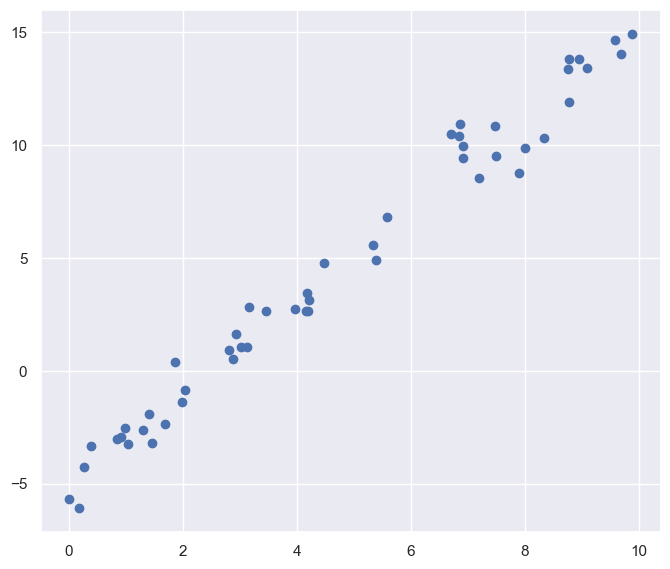

In [3]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

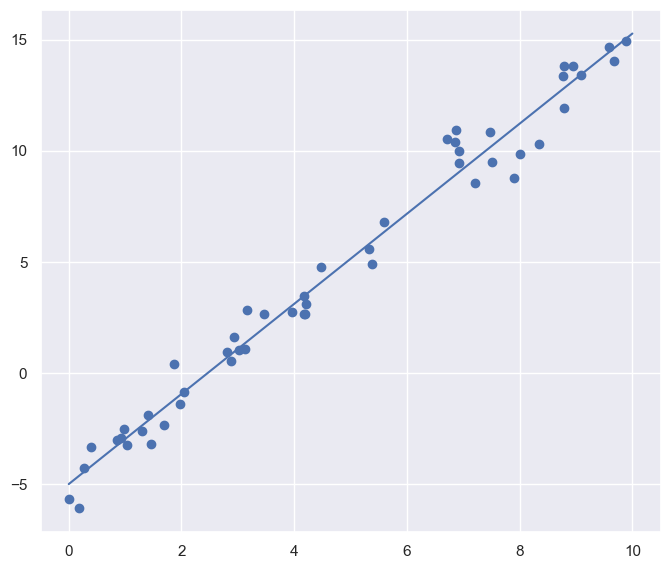

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) ## init
model.fit(x[:, np.newaxis], y) ## fit
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis]) ## predict

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [5]:
model.coef_

array([2.02720881])

In [6]:
model.intercept_

-4.998577085553202

In [7]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000127
[ 1.5 -2.   1. ]


# Advertising Data
Explore

In [8]:
import pandas as pd
adv = pd.read_csv('../_input/islr/Advertising.csv', usecols=(1,2,3,4))

In [9]:
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


We predict Sales by using the spending for TV, Radio and Newspaper.

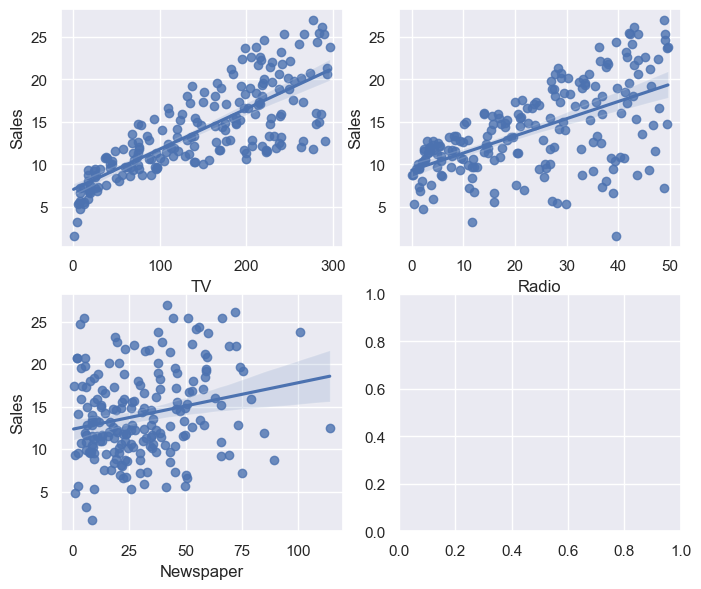

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2)

sns.regplot(x='TV',y='Sales', data=adv, ax=ax[0,0])
sns.regplot(x='Radio',y='Sales', data=adv, ax=ax[0,1])
sns.regplot(x='Newspaper',y='Sales', data=adv, ax=ax[1,0]);

We use sklearn to get the slope and intercept of the data between TV and Sales.

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np
lm = LinearRegression() # init
xfit = lm.fit(adv['TV'].values[:, np.newaxis], adv['Sales'].values) # fit

In [12]:
xfit.coef_

array([0.04753664])

In [13]:
xfit.intercept_

7.032593549127693

Graph the line into the dataset to see how it fits.

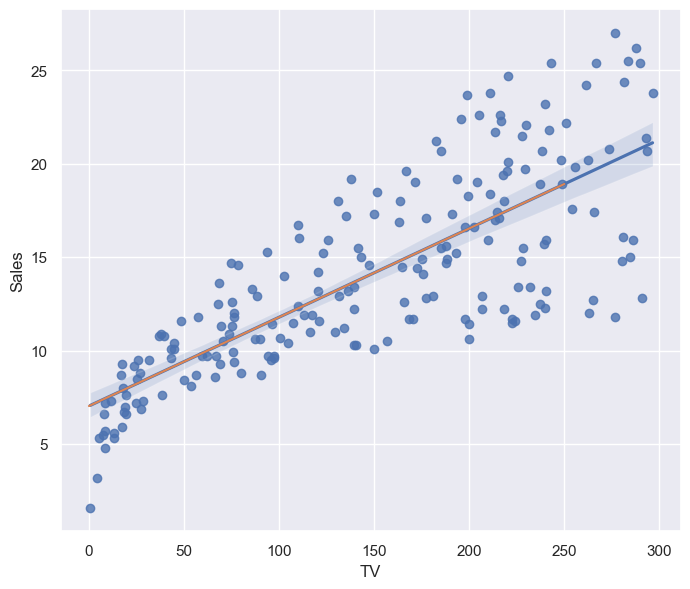

In [14]:
sns.regplot(x='TV', y='Sales', data=adv)
plt.plot([0, 250],[xfit.predict([[0]]), xfit.predict([[250]])]);

If X is at zero, then the value of y would below and this is the intercept.

In [15]:
xfit.predict([[0]])

array([7.03259355])

If X is 5 and 250, then we get the corresponding values for Y. Add a line between these points and you get the regression line.

But how are these coefficients being calculated?

In [16]:
[xfit.predict([[5]]), xfit.predict([[250]])]

[array([7.27027675]), array([18.91675366])]

# Estimating the Coefficients
I want to calculate the intercept and slope manually so that I can understand the concept of it.

In [17]:
x = adv['TV']
y = adv['Sales']

There are two components to the slope. First is the sum distance of each point of x away from its means multiplied by distance of y from its mean. The denominator is the squared distance of x from its mean. This formula calculates the slope where RSS is minimized as small as possible.

In [18]:
## Breaking down the slope
distance_coefficient = sum((x - x.mean()) * (y - y.mean()))
spread_x = sum((x - x.mean())**2)
slope =  distance_coefficient / spread_x
slope

0.04753664043301969

In [19]:
# b0 is the intercept
intercept = y.mean() - slope * x.mean()
intercept

7.032593549127705

The intercept is the starting point of the regression line. Remember that the regression line is the average of x and y. We get it by subtracting the product of slope and the x.mean by y mean.

In [20]:
yhat = intercept + slope * adv['TV']
yhat

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Name: TV, Length: 200, dtype: float64

Now that we know the intercept and slope, we can use the points of x to estimate the value of y by adding intercept and multiplying slope with all the points of x.

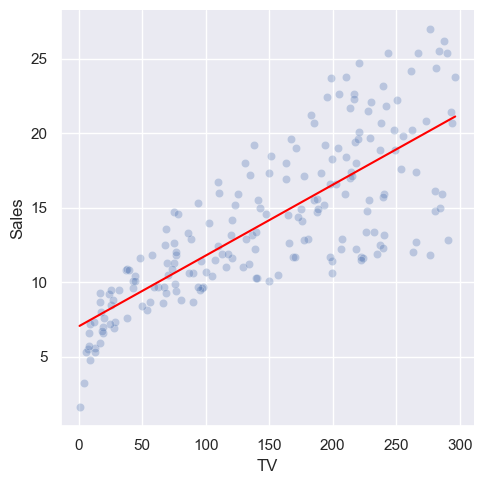

In [21]:
sns.relplot(x=x, y=y, alpha=.3)
sns.lineplot(x=x, y=yhat, color='red');

We get the regression line - the line that has the minimum distance from all the points in our data.

# Assessing the Accuracy of the Coefficient Estimates

The regression line is based on the observed data. Which means that is only an estimate of truth based on what we currently know. There is a chance that the line would not exactly match the truth. So, instead of having a line estimate, we create a boundary around that line where we suspect that the true population line exists, which is called the Confidence Interval.

If we ran a 100 trials, 95 of those would be within the confidence interval. And if you average all of those 100 trials, the outcome would be very close to the truth.

In [22]:
print(intercept, slope)

7.032593549127705 0.04753664043301969


The confidence interval are just the standard deviations. A 95% confidence interval is around +- 1.98 standard deviations away from the mean. 
> The term SD is usually reserve for the population data. So instead, we use the term Standard Error or SE for the estimated data. But essentially, it is the same as the sd but for the estimated data.

In [23]:
rss = sum((y - yhat)**2)
rss

2102.5305831313517

To calculate of SE, we use the RSS or the sum of the squared distance between all the points away from yhat or the regression line that we made. It is essentially the variance of the estimated data. To get the SE, we square root the variance.

In [24]:
n = len(adv)
rse = np.sqrt((rss/(n-2)))
rse

3.258656368650463

But because this is an estimate, we are making an assumption therefore we divide by n - 2 degrees of freedom. The result is the RSE or Residual Standard Error.

In [25]:
yhat.name = 'target'
se_slope = np.sqrt(rse**2 / sum( (x - x.mean())**2 ) )
se_slope

0.00269060718779687

In [26]:
se_intercept = np.sqrt(
    rse**2 * ( 1/n + (x.mean()**2 / sum((x - x.mean())**2))  ))
se_intercept

0.45784294027347844

In [27]:
slope + se_slope * 2

0.052917854808613426

In [28]:
ci = 1.98
yhat_se_up = (
    (intercept + (ci*se_intercept)) + 
    (slope + (ci*se_slope)) *
    adv['TV'])
    
yhat_se_down = (
    (intercept -(ci*se_intercept)) +
    (slope - (ci*se_slope)) *
    adv['TV'])

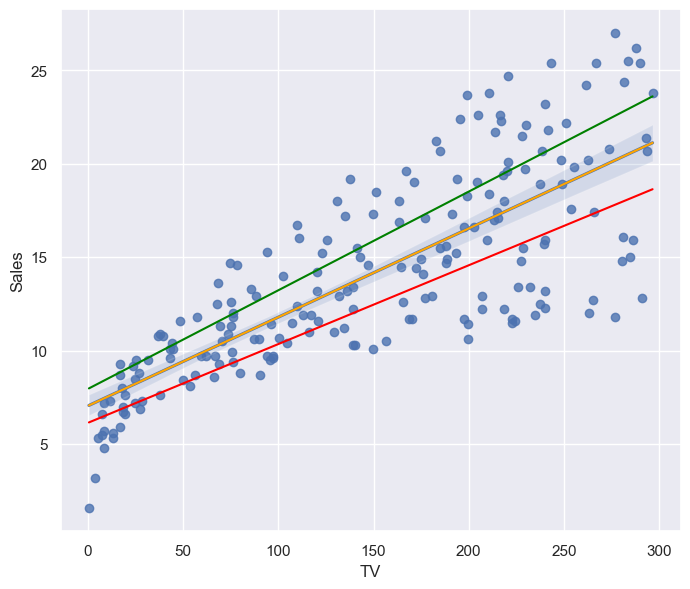

In [29]:
# sns.relplot(x=x, y=y, alpha=.3)
# sns.lineplot(x=x, y=yhat, color='red');
sns.regplot(x='TV', y='Sales', data=adv, n_boot=100)

sns.lineplot(x=x, y=yhat_se_up, color='green');
sns.lineplot(x=x, y=yhat_se_down, color='red');
sns.lineplot(x=x, y=yhat, color='orange');



## t-statistic
From the standard Error, we calculate the t-statistic which is the exact point from the standard deviation.

In [30]:
(slope - 0) / se_slope

17.667625600875528

In [31]:
(intercept - 0) / se_intercept

15.360275174117573

# Assessing the Accuracy of the Model
Quantify the extent to which the model fits the data.
- RSE 3.26
- R2 0.612
- F-statistic

In [32]:
np.sqrt(sum((y - yhat)**2) / (n-2))

3.258656368650463

In [33]:
tss = sum((y - y.mean())**2)
tss

5417.148749999998

TSS or Total Sum of Squares or Variance measures variability of Y before the regession is ran.

In [34]:
print(sum((y - yhat)**2))
rss

2102.5305831313517


2102.5305831313517

In contrast, RSS measures the amount of variability that is left unexplained after performing the regression line.

In [35]:
r2 = (tss - rss) / tss
r2

0.6118750508500708

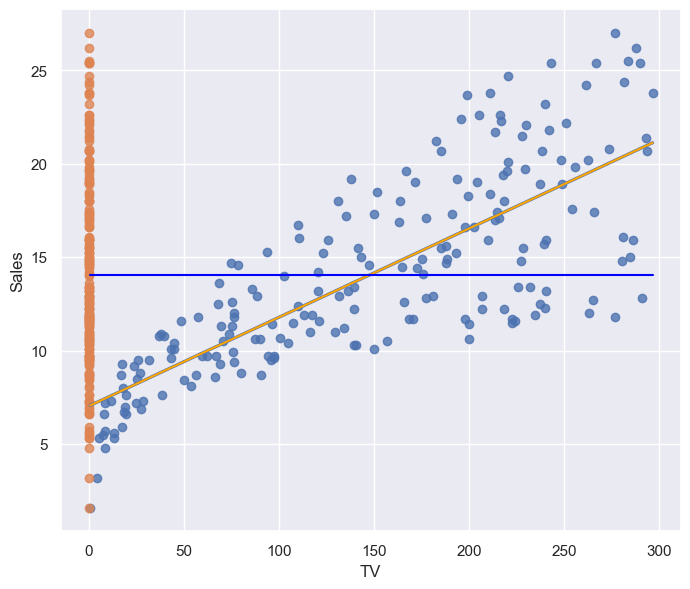

In [36]:
sns.regplot(x='TV', y='Sales', data=adv, ci=False)
sns.regplot(x=np.zeros(n), y='Sales', data=adv, ci=False)

sns.lineplot(x=x, y=yhat, color='orange');
sns.lineplot(x=x, y=y.mean(), color='blue');

TSS - RSS measures the amount of variability in the response that is explained by performing the regression.

# Multiple Linear Regression
In reality, we would have 2 or more predictors.
- Option 1: is to run separate linear regressions to each predictor. But doing a regression line to just one of the predictor will ignore the other predictors, which leads to misleading results.
- Option 2: is have a regression line for all predictors with each predictor having their own slope.

In [37]:
target = adv['Sales']

In [38]:
newspaper = adv['Newspaper']

In [39]:
## Breaking down the slope
def findSlope(x, y):
    distance_coefficient = sum((x - x.mean()) * (y - y.mean()))
    spread_x = sum((x - x.mean())**2)
    slope =  distance_coefficient / spread_x
    return slope

In [40]:
slope = findSlope(newspaper, target)
slope

0.054693098472273306

In [41]:
def findIntercept(x, y, slope):
    intercept = y.mean() - slope * x.mean()
    return intercept

In [42]:
intercept = findIntercept(newspaper, target, slope)
intercept

12.351407069278164

In [43]:
yhat = intercept + slope * newspaper

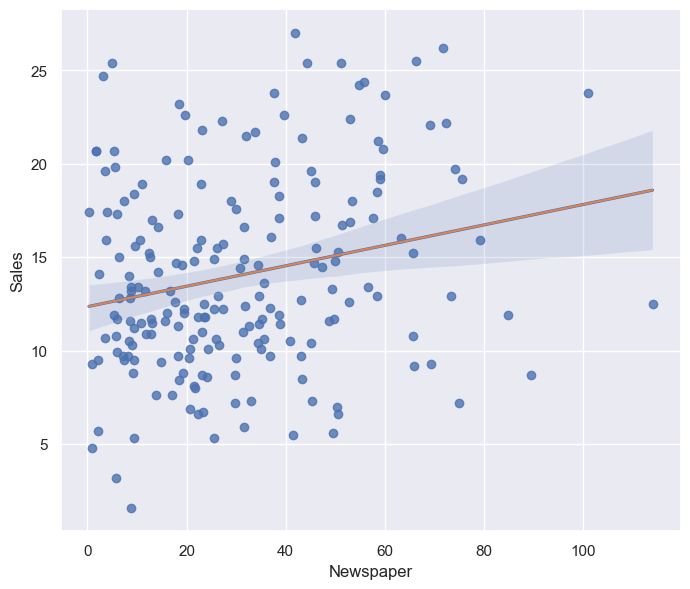

In [44]:
sns.regplot(x='Newspaper', y='Sales', data=adv)
sns.lineplot(x=newspaper, y=yhat);

In [45]:
rss = sum((target - yhat)**2)
rss

5134.804544111939

In [46]:
rse = np.sqrt((rss / (n - 2)))
rse

5.092480366520192

In [47]:
se_slope = np.sqrt(rse**2 / sum( (newspaper - newspaper.mean())**2 ) )
se_slope

0.016575721876358158

In [48]:
se_intercept = np.sqrt(
    rse**2 * ( 1/n + (newspaper.mean()**2 / sum((newspaper - newspaper.mean())**2))  ))
se_intercept

0.6214201876094343

In [49]:
t_stat_intercept = (intercept - 0) / se_intercept
t_stat_intercept

19.87609562024896

In [50]:
t_stat_slope = (slope - 0) / se_slope
t_stat_slope

3.299590743633417

In [51]:
from scipy.stats import norm
print(1-norm.cdf(t_stat_intercept), 1-norm.cdf(t_stat_slope))

0.0 0.0004841295909323584


This is just a refresher to do it manually.

## Now do the Automated way

In [52]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
xfit = lm.fit(newspaper.values[:, np.newaxis], target.values)
print(xfit.coef_, xfit.intercept_)

[0.0546931] 12.35140706927816


For every 1000 usd we spend on Newspaper, we sell around 55 more units.

In [53]:
lm = LinearRegression()
xfit = lm.fit(adv['Radio'].values[:, np.newaxis], target.values)
print(xfit.coef_, xfit.intercept_)

[0.20249578] 9.311638095158283


For every 1000 usd we spend on Radio, we sell around 202 more units.

In [54]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## Regression Line for all Predictors

In [55]:
lm = LinearRegression()
xfit = lm.fit(adv[['TV', 'Radio', 'Newspaper']].values, target.values)
print(xfit.coef_, xfit.intercept_)

[ 0.04576465  0.18853002 -0.00103749] 2.9388893694594085


In [56]:
xfit.predict(adv[['TV', 'Radio', 'Newspaper']].values)

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

In [57]:
yhat = (xfit.intercept_ +
        xfit.coef_[0] * adv['TV'] +
        xfit.coef_[1] * adv['Radio'] +
        xfit.coef_[2] * adv['Newspaper'] )
yhat

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64

In [58]:
rss = sum((target - yhat)**2)
rss

556.8252629021873

In [59]:
tss = sum((target - target.mean())**2)
tss

5417.148749999998

In [73]:
f_stat = ((tss - rss)/3) / (rss/(n-3-1))
f_stat

570.2707036590938

F-statistic is the ratio between what the linear regression solves vs that of the errors that remains. (TSS - RSS) : RSS

In [61]:
57000 / 100

570.0

the large F-statistic suggests that at least one of the advertising media must be related to sales.

In [62]:
r2 = (tss-rss)/tss
r2

0.8972106381789521

In [63]:
rse = np.sqrt((rss / (n - 3 -1)))
rse

1.6855103734147443

In [76]:
import statsmodels.formula.api as sm
est = sm.ols(formula='Sales ~ TV + Radio + Newspaper', data=adv)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        04:30:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0